In [1]:
import pandas as pd
import numpy as np

In [2]:
#Loading data
from google.colab import files
uploaded = files.upload() ## Uploading from local.


Saving vehiclesFinal.csv to vehiclesFinal (1).csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['vehiclesFinal.csv'])) ## Code snippet copied from Google
df.head()


,id,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,7119256118,mohave county,2012.0,jeep,patriot,like new,4 cylinders,gas,247071.0,clean,automatic,4wd,full-size,offroad,silver,34.4554,-114.2690,3495
1,7120880186,oregon coast,2014.0,bmw,328i m-sport,good,5 cylinders,gas,76237.0,clean,automatic,rwd,full-size,sedan,grey,46.1837,-123.8240,13750
2,7115048251,greenville / upstate,2001.0,dodge,caravan,excellent,6 cylinders,gas,199000.0,clean,automatic,4wd,full-size,offroad,grey,34.9352,-81.9654,2300
3,7119250502,mohave county,2004.0,chevrolet,colorado ls,excellent,5 cylinders,gas,54000.0,clean,automatic,rwd,mid-size,pickup,red,34.4783,-114.2710,9000
4,7120430837,maine,2005.0,ford,mustang convertible,excellent,6 cylinders,gas,62800.0,clean,automatic,rwd,mid-size,convertible,silver,44.2070,-69.7858,8500


In [4]:
df.shape

(374222, 18)

In [5]:
df.columns

Index(['id', 'region', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'lat', 'long', 'price'],
      dtype='object')

In [7]:
df2 = df.sample(500)
df2.shape

(500, 18)

# DATA VISUALIZATION:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

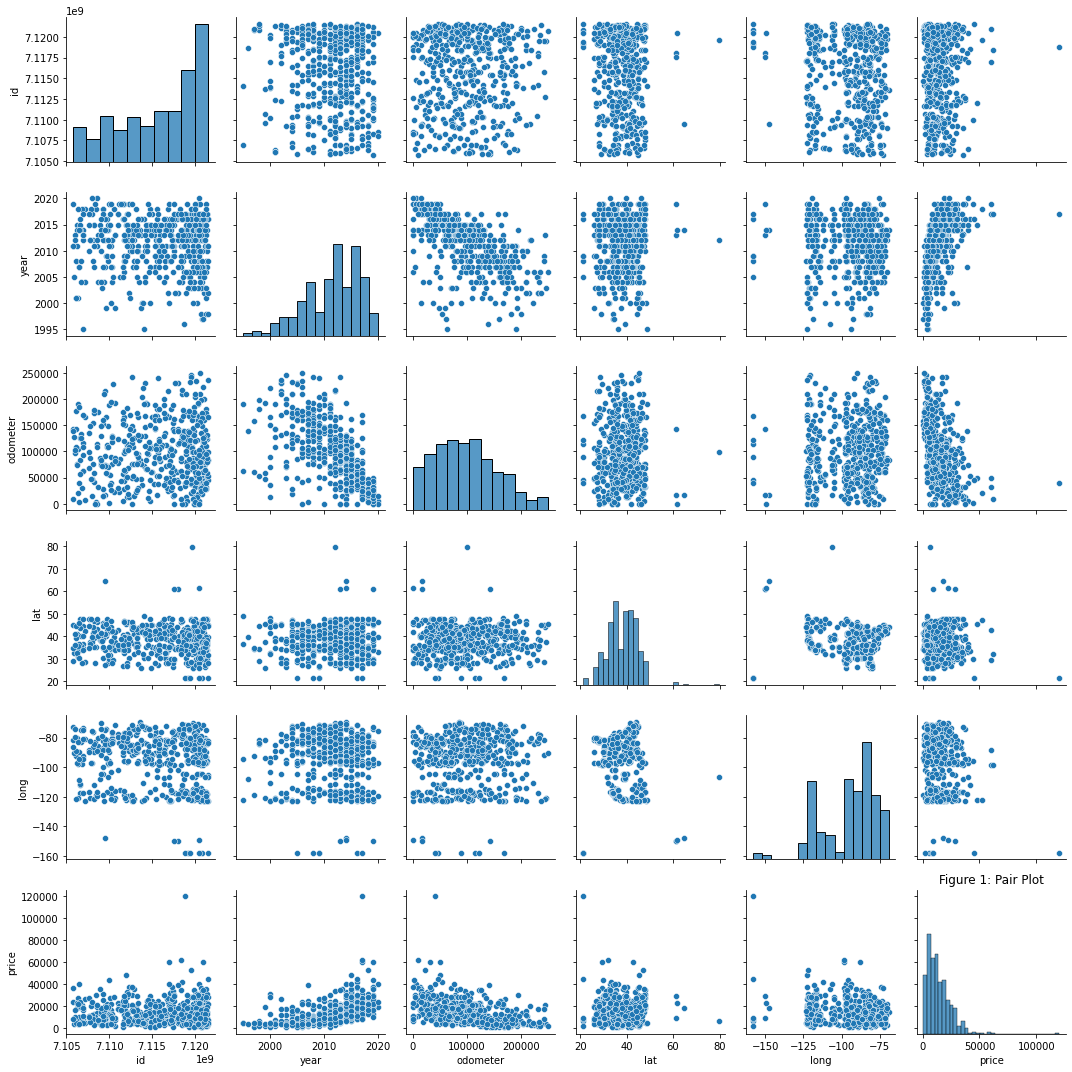

In [ ]:
sns.pairplot(df2)
plt.title('Figure 1: Pair Plot')
plt.tight_layout()
plt.show()

# MODEL IMPLEMENTATIONS:

In [8]:
import time
from tqdm import tqdm

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score,mean_squared_error


In [9]:
df=df.drop('id',axis=1)

df3=df.copy()
df.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,mohave county,2012.0,jeep,patriot,like new,4 cylinders,gas,247071.0,clean,automatic,4wd,full-size,offroad,silver,34.4554,-114.2690,3495
1,oregon coast,2014.0,bmw,328i m-sport,good,5 cylinders,gas,76237.0,clean,automatic,rwd,full-size,sedan,grey,46.1837,-123.8240,13750
2,greenville / upstate,2001.0,dodge,caravan,excellent,6 cylinders,gas,199000.0,clean,automatic,4wd,full-size,offroad,grey,34.9352,-81.9654,2300
3,mohave county,2004.0,chevrolet,colorado ls,excellent,5 cylinders,gas,54000.0,clean,automatic,rwd,mid-size,pickup,red,34.4783,-114.2710,9000
4,maine,2005.0,ford,mustang convertible,excellent,6 cylinders,gas,62800.0,clean,automatic,rwd,mid-size,convertible,silver,44.2070,-69.7858,8500


In [11]:
#defining numerical and categorical values

num_col=['year','odometer','long','lat']

cat_cols=['region','manufacturer','model','condition','cylinders','fuel',
          'title_status','transmission','drive','size','type','paint_color']

In [12]:
# Encoding categorical columns.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[cat_cols]=df[cat_cols].apply(le.fit_transform)

In [14]:
df.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,220,2012.0,19,20087,3,3,2,247071.0,0,0,0,1,6,9,34.4554,-114.2690,3495
1,258,2014.0,4,2438,2,4,2,76237.0,0,0,2,1,9,5,46.1837,-123.8240,13750
2,131,2001.0,9,9105,0,5,2,199000.0,0,0,0,1,6,5,34.9352,-81.9654,2300
3,220,2004.0,7,9929,0,4,2,54000.0,0,0,2,2,8,8,34.4783,-114.2710,9000
4,202,2005.0,12,19107,0,5,2,62800.0,0,0,2,2,2,9,44.2070,-69.7858,8500


In [15]:
# Scaling Numerical columns

norm = StandardScaler()
df['odometer'] = norm.fit_transform(np.array(df['odometer']).reshape(-1,1))
df['year'] = norm.fit_transform(np.array(df['year']).reshape(-1,1))
df['model'] = norm.fit_transform(np.array(df['model']).reshape(-1,1))


df['region'] = norm.fit_transform(np.array(df['region']).reshape(-1,1))
df['lat'] = norm.fit_transform(np.array(df['lat']).reshape(-1,1))
df['long'] = norm.fit_transform(np.array(df['long']).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [16]:
df.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,0.256165,0.157474,19,0.617681,3,3,2,2.611323,0,0,0,1,6,9,-0.661679,-1.077181,8.159089
1,0.582340,0.537358,4,-1.808705,2,4,2,-0.403124,0,0,2,1,9,5,1.266062,-1.607946,9.528794
2,-0.507772,-1.931885,9,-0.892125,0,5,2,1.763088,0,0,0,1,6,5,-0.582816,0.717233,7.740664
3,0.256165,-1.362060,7,-0.778842,0,4,2,-0.795506,0,0,2,2,8,8,-0.657915,-1.077292,9.104980
4,0.101661,-1.172118,12,0.482951,0,5,2,-0.640226,0,0,2,2,2,9,0.941159,1.393791,9.047821


Splitting data into test and train datasets

In [18]:
from sklearn.model_selection import train_test_split

n = list(range(len(list(df.columns))-1))
X = df.iloc[:,n]
y = df.iloc[:,-1:].values.T
y=y[0]

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.9,
                                                    test_size=0.1,random_state=40)

In [19]:
#some of models will predict neg values so this function will remove that values
def remove_neg(y_test,y_pred):
    ind=[index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred=y_pred[ind]
    y_test=y_test[ind]
    y_pred[y_pred<0]
    return (y_test,y_pred)

#function for evaluation of model
def result(y_test,y_pred):
    r=[]
    r.append(mean_squared_log_error(y_test, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)

#dataframe that store the performance of each model
accu=pd.DataFrame(index=['MSLE', 'Root MSLE', 'R2 Score','Accuracy(%)'])    

# SIMPLER MODELS

In [21]:
import time
import matplotlib

#libraries for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#libraries for evaluation
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error

#from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')


1. Linear regression

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [24]:
#removing negative values
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r1_lr=result(y_test_1,y_pred_1)

print('Coefficients: \n', LR.coef_)
print("MSLE : {}".format(r1_lr[0]))
print("Root MSLE : {}".format(r1_lr[1]))
print("R2 Score : {} or {}%".format(r1_lr[2],r1_lr[3]))
accu['Linear Regression']=r1_lr
#Ignoring line 15 and 16

Coefficients: 
 [-0.00240206  0.41084887 -0.00048152  0.00049764 -0.02314021  0.18633976
 -0.24255281 -0.20177816 -0.0763671   0.07486604 -0.09274472 -0.02754701
 -0.00141668  0.00406738  0.01719698 -0.06149138]
MSLE : 0.0024442162117526986
Root MSLE : 0.04943901507668512
R2 Score : 0.5955678395786822 or 59.5568%


2. Ridge regression

In [25]:
from sklearn.linear_model import Ridge, RidgeCV

In [27]:
Ridge_Regression = Ridge()
Ridge_Regression.fit(X_train, y_train)
y_pred = Ridge_Regression.predict(X_test)

In [28]:
y_test_2, y_pred_2 = remove_neg(y_test,y_pred)
r2_ridge = result(y_test_2,y_pred_2)

print("MSLE : {}".format(r2_ridge[0]))
print("Root MSLE : {}".format(r2_ridge[1]))
print("R2 Score : {} or {}%".format(r2_ridge[2],r2_ridge[3]))
accu['Ridge Regression']=r2_ridge
#Ignoring line 20

MSLE : 0.002444218156945417
Root MSLE : 0.04943903474932957
R2 Score : 0.5955673581471799 or 59.5567%


3. Lasso Regression

In [29]:
from sklearn.linear_model import Lasso, LassoCV

In [30]:
lasso=Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)

In [31]:
y_test_3, y_pred_3 = remove_neg(y_test,y_pred)
r3_lasso = result(y_test_3,y_pred_3)

print("MSLE : {}".format(r3_lasso[0]))
print("Root MSLE : {}".format(r3_lasso[1]))
print("R2 Score : {} or {}%".format(r3_lasso[2],r3_lasso[3]))
accu['Lasso Regression']=r3_lasso

MSLE : 0.002444229620433594
Root MSLE : 0.04943915068479225
R2 Score : 0.5955665302723958 or 59.5567%


4. KNN

In [32]:
from sklearn.neighbors import KNeighborsRegressor

In [33]:
#estimating MSLE for k=1-9
R_MSLE=[]
for i in range(1,10):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train,y_train)
    y_pred=KNN.predict(X_test)
    error=np.sqrt(mean_squared_log_error(y_test, y_pred))
    R_MSLE.append(error)
    print("K =",i," , Root MSLE =",error)
    #skipping line 25

K = 1  , Root MSLE = 0.0426578117418555
K = 2  , Root MSLE = 0.03924836309971968
K = 3  , Root MSLE = 0.038385981026102196
K = 4  , Root MSLE = 0.03817065894015624
K = 5  , Root MSLE = 0.038139897132037776
K = 6  , Root MSLE = 0.038207852204206
K = 7  , Root MSLE = 0.0383267748408071
K = 8  , Root MSLE = 0.03843377967700702
K = 9  , Root MSLE = 0.03861385354009933


In [35]:
KNN=KNeighborsRegressor(n_neighbors=5) ## Using k = 5, since it has least error
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)

In [36]:
#model evaluation
r4_knn=result(y_test,y_pred)
print("MSLE : {}".format(r4_knn[0]))
print("Root MSLE : {}".format(r4_knn[1]))
print("R2 Score : {} or {}%".format(r4_knn[2],r4_knn[3]))
accu['KNN']=r4_knn

MSLE : 0.0014546517532424235
Root MSLE : 0.038139897132037776
R2 Score : 0.765095455068974 or 76.5095%


In [ ]:
#accu.to_csv('errors.csv')

5. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=200,random_state=0, min_samples_leaf=1,
                                  max_features=0.5, n_jobs=-1, oob_score=True) ## Will have to tune hyper parameters more. Grid Search CV was too time consuming, hence we decided to go with some defaults
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

In [ ]:
r5_rf=result(y_test,y_pred)
print("MSLE : {}".format(r5_rf[0]))
print("Root MSLE : {}".format(r5_rf[1]))
print("R2 Score : {} or {}%".format(r5_rf[2],r5_rf[3]))
accu['RandomForest Regressor']=r5_rf
#ignoring line 33 and 34

6. XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',
                max_depth = 24, alpha = 5, n_estimators = 200)
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

In [ ]:
#model evaluation
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r8_xg=result(y_test_1,y_pred_1)
print("MSLE : {}".format(r8_xg[0]))
print("Root MSLE : {}".format(r8_xg[1]))
print("R2 Score : {} or {}%".format(r8_xg[2],r8_xg[3]))
#ignorning line 46

In [ ]:
# accu['XGBoost Regressor']=r8_xg
# accu.to_csv('errors.csv')